In [10]:
# Plots for Sensor paper

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'


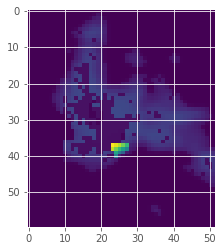

In [11]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
importlib.reload(ps)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
data = pd.read_csv("th100_atol_15_dirdelta_1.csv")
variogram_set = np.array(data.iloc[:,3:])


#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)
#EAM[37][23]+=1

nonsat = ps.desaturate(luminance,th=62)


variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
coords = np.array(data.iloc[:,1:3])


NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
sensitivity = ps.f5(NLTI,EAM,5)


aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,coords)


aptitude.selectFitnessFunction("max")
f = aptitude.f

X = np.array([37,23])
f(X)

plt.imshow(sensitivity)

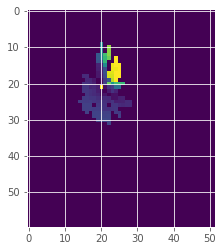

In [12]:
fig, ax = plt.subplots()
variograms[500][coords[500][0]][coords[500][1]]=np.max(variograms[500])
ax.imshow(variograms[500])
fig.savefig('region_r_at_21_20.eps', format='eps', dpi=100)

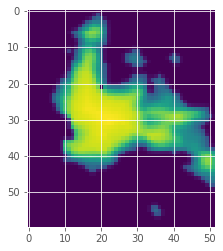

In [13]:

fig, ax = plt.subplots()
NLTI[coords[500][0]][coords[500][1]]=0
ax.imshow(NLTI)
fig.savefig('NLTI_sensor_at_21_20.eps', format='eps', dpi=100)